### IMPORTS

In [89]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
SAVE_PATH = "../saves/"

In [92]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

### Visualization

In [93]:
print(os.listdir(SAVE_PATH))
savefile = os.listdir(SAVE_PATH)[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'saves_1710424156961.csv', 'saves_1710424454746.csv', 'saves_1710424515049.csv', 'saves_1710424637019.csv', 'saves_1710424916129.csv', 'saves_1710429089587.csv', 'saves_1710429514728.csv', 'saves_1710429727788.csv', 'saves_1710429865873.csv', 'saves_1710429985239.csv', 'saves_1710430130919.csv', 'saves_1710430150347.csv', 'saves_1710430307672.csv', 'saves_1710430871920.csv', 'saves_1710431208782.csv', 'saves_1710433005888.csv', 'saves_1710433038829.csv', 'saves_1710433067539.csv', 'saves_1710433104086.csv', 'saves_1710433145786.csv', 'saves_1710433231572.csv', 'saves_1710433284422.csv', 'saves_1710433317750.csv', 'saves_1710433333342.csv', 'saves_1710433396034.csv', 'saves_1710433430620.csv', 'saves_1710433540895.csv', 'saves_1710433601737.csv', 'saves_1710433642142.csv', 'saves_1710433666142.csv', 'saves_1710433698580.csv', 'saves_1710433876094.csv', 'saves_1710436421269.csv', 'saves_1710436501194.csv', 'saves_1710437276237.csv', 'saves_1710437338617.csv', 'saves_171043

'Visualizing data from: saves_1710501794333.csv'

In [94]:
# Read CSV
contracts = pd.read_csv(SAVE_PATH+savefile, sep=';')
contracts.drop_duplicates(inplace=True)
print(contracts.shape)
contracts.head()

(9995, 6)


,utilA,utilB,utilSum,contract,index,pareto
0,2342,7558,9900,"[146,114,64,79,185,54,52,25,98,3,120,178,118,4...",0,False
1,2337,7573,9910,"[146,114,64,79,185,151,52,25,98,3,120,178,118,...",1,False
2,2254,7661,9915,"[34,114,64,79,185,62,98,25,115,78,120,178,118,...",2,False
3,2503,7521,10024,"[146,114,64,79,185,76,52,199,3,98,120,178,118,...",4,False
4,2302,7632,9934,"[146,114,64,79,185,54,25,61,52,115,120,178,118...",5,False


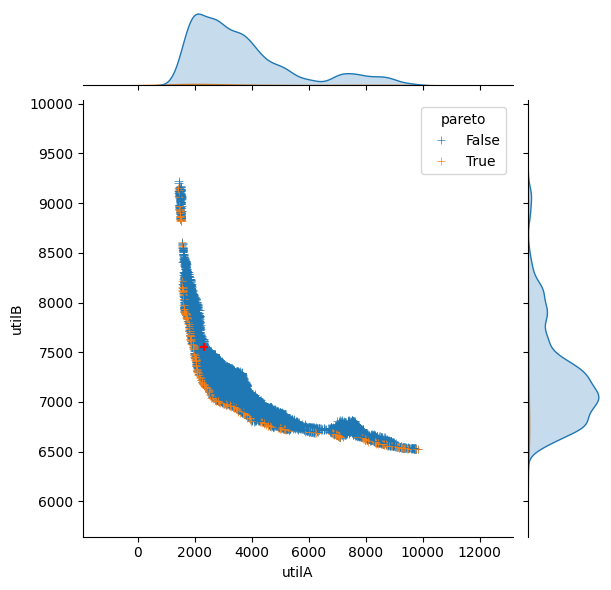

In [95]:
if "pareto" in contracts.columns:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red', marker="+")
else:
    contracts["index"] = contracts.index
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="index", marker="+")
    plt.scatter(contracts.loc[0,"utilA"], contracts.loc[0,"utilB"], color='red')

In [96]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns:
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.drop_duplicates()
    contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
contracts

,utilA,utilB,utilSum,contract,index,pareto
0,2342,7558,9900,"[146,114,64,79,185,54,52,25,98,3,120,178,118,4...",0,False
1,2337,7573,9910,"[146,114,64,79,185,151,52,25,98,3,120,178,118,...",1,False
2,2254,7661,9915,"[34,114,64,79,185,62,98,25,115,78,120,178,118,...",2,False
3,2503,7521,10024,"[146,114,64,79,185,76,52,199,3,98,120,178,118,...",4,False
4,2302,7632,9934,"[146,114,64,79,185,54,25,61,52,115,120,178,118...",5,False
...,...,...,...,...,...,...
9990,1820,7718,9538,"[174,180,41,22,26,178,120,3,2,130,132,117,77,1...",9991,False
9991,1795,7765,9560,"[174,180,12,22,26,178,120,3,2,130,132,117,77,1...",9992,True
9992,1783,7784,9567,"[174,180,12,22,26,178,120,3,2,130,24,117,77,11...",9993,True
9993,1813,7716,9529,"[50,180,12,22,26,178,120,3,2,130,24,117,77,112...",9994,False
